In [1]:
import pandas as pd

In [2]:
# Read the CSV file and specify the separator as ';'
df = pd.read_csv('SW_Aqr-2024-11-18T15_02_27.csv', sep=';', encoding='utf-8')

In [3]:
mydata =  df[["HJD","Uncert.","O-C","E"]]

In [4]:
mydata.head()

,HJD,Uncert.,O-C,E
0,2419674.398,0.01,0.0142,-77803
1,2419685.419,0.01,0.0119,-77779
2,2419686.338,0.01,0.0123,-77777
3,2419687.257,0.01,0.0127,-77775
4,2420024.383,0.01,0.0102,-77041


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# filename = "SW_Aqr-O-C.dat"

# GCVS elements of SW Aqr:
JD0=2452896.7
P = 0.4593
print ("\nInitial elements: {:.4f} + {:.8f} E".format(JD0,P))
print("Read ",mydata)


Initial elements: 2452896.7000 + 0.45930000 E
Read                HJD  Uncert.     O-C      E
0    2.419674e+06   0.0100  0.0142 -77803
1    2.419685e+06   0.0100  0.0119 -77779
2    2.419686e+06   0.0100  0.0123 -77777
3    2.419687e+06   0.0100  0.0127 -77775
4    2.420024e+06   0.0100  0.0102 -77041
..            ...      ...     ...    ...
269  2.460179e+06   0.0120  0.0089  10385
270  2.460201e+06   0.0013  0.0077  10433
271  2.460219e+06   0.0009  0.0070  10472
272  2.460224e+06   0.0012  0.0075  10483
273  2.460225e+06   0.0001  0.0088  10485

[274 rows x 4 columns]


In [10]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HJD      274 non-null    float64
 1   Uncert.  274 non-null    float64
 2   O-C      274 non-null    float64
 3   E        274 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 8.7 KB


In [11]:
#specify path for export
path = r'C:\Users\lenevo\Desktop\OISA2024\1st day\filesforthehandsonmonday\my_data.txt'

#export DataFrame to text file
with open(path, 'a') as f:
    df_string = mydata.to_string(header=True, index=False)
    f.write(df_string)

In [16]:
filename ="my_data.txt"

In [18]:
dta = []
dta = np.loadtxt(filename, comments='#')
JD=dta[:,0]
err=dta[:,1]
OC=dta[:,2]
E=dta[:,3]
print("Number of points:", len(dta))

Number of points: 274


In [19]:

n = 1  # degree of polynomial
p, C_p = np.polyfit(E, OC, n, cov=True)  # C_p is estimated covariance matrix  
JD0 = JD0+p[1]
P0= P+p[0]
dJD0 = np.sqrt(np.diag(C_p))[1]
dP0= np.sqrt(np.diag(C_p))[0]

In [21]:
print("\nNew elements: {:.4f} + {:.8f} E ".format(JD0,P0))
print("                  ± {:.4f} ± {:.8f}  ".format(dJD0,dP0))
print("\nCovariance matrix: ")
print(C_p)
# Do the interpolation for plotting:
t = np.linspace(-77000, 20000, 500)
# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([t**(n-i) for i in range(n+1)]).T
yi = np.dot(TT, p)  # matrix multiplication calculates the polynomial values
C_yi = np.dot(TT, np.dot(C_p, TT.T)) # C_y = TT*C_z*TT.T
sig_yi = np.sqrt(np.diag(C_yi))  # Standard deviations are sqrt of diagonal



New elements: 2452896.7033 + 0.45930002 E 
                  ± 0.0003 ± 0.00000001  

Covariance matrix: 
[[1.06263916e-16 1.58130907e-12]
 [1.58130907e-12 9.75272519e-08]]


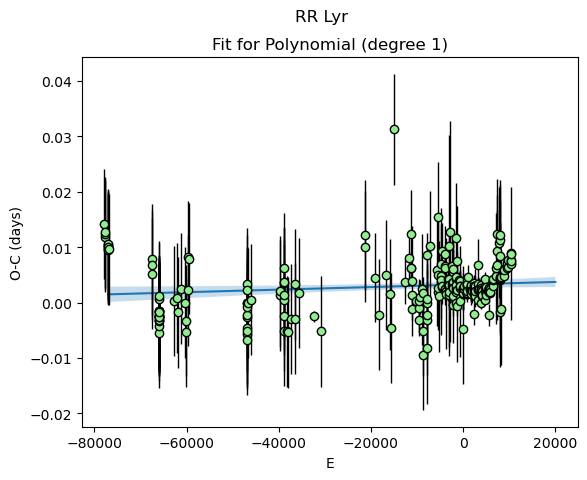

In [23]:
# Do the plotting:
fg, ax = plt.subplots(1, 1)
ax.set_title("Fit for Polynomial (degree {})".format(n))
ax.fill_between(t, yi+2*sig_yi, yi-2*sig_yi, alpha=.25)
ax.plot(t, yi,'-')
ax.errorbar(E, OC, yerr=err, color="lightgreen", fillstyle="full", fmt='o', ecolor="black", elinewidth=1, mec="black")
ax.set_xlabel("E")
ax.set_ylabel("O-C (days)")
ax.axis('tight')

plt.suptitle("RR Lyr")

fg.canvas.draw()
plt.show()

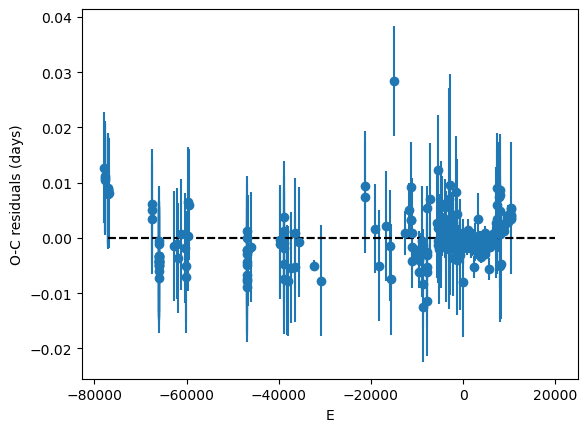

In [24]:
# Plot residuals
plt.errorbar(E, OC-np.polyval(p, E), xerr=0, yerr=err, fmt='o')
plt.xlabel("E")
plt.ylabel("O-C residuals (days)")
x = [-77000, 20000]
y = [0,0] 
plt.plot(x,y, '--k', x, y, '--k')

fg.canvas.draw()
plt.show()